**Задача.** Найти профиль осесимметричной линзы $z(r)$, образованной поверхностями

$$
z_1(r) = z(r), \quad z_2(r) = -z(r)
$$

из материала с показателем преломления $n$, такой, чтобы параллельный пучок любого диаметра, падающий вдоль оси $z$, сходился в одну точку на оси $z$ на расстоянии $f$ от центра линзы.

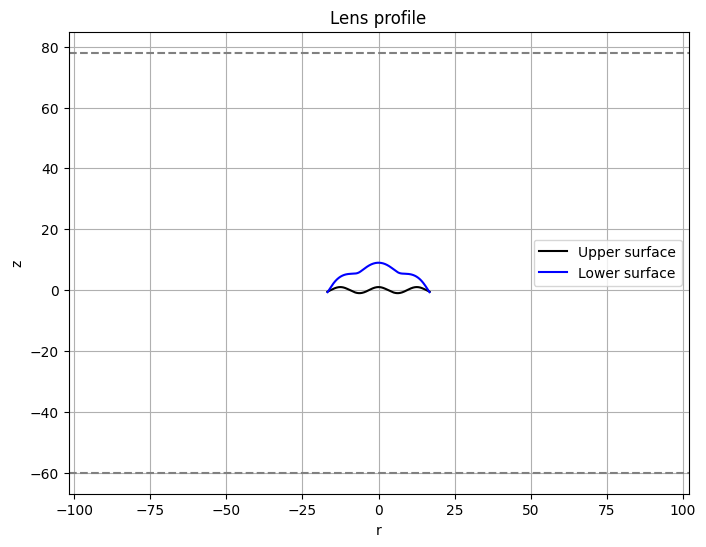

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Параметры системы
# -----------------------------
s1 = 1
n = 1.5
t = 8
ta = -60
tb = 70
basez = ta
topez = tb + t
rmax = 16.8

# -----------------------------
# 2. Определение функций
# -----------------------------
def za(ra):
    return np.cos(ra * 0.5)

def dza(ra):
    return -0.5 * np.sin(ra * 0.5)

def Phi(ra):
    z = za(ra)
    dz = dza(ra)
    num = 1 - ((ra + (-ta + z) * dz)**2) / (n**2 * (ra**2 + (ta - z)**2) * (1 + dz**2))
    return np.sqrt(num) / np.sqrt(1 + dz**2)

def ri(ra):
    z = za(ra)
    dz = dza(ra)
    return (ra + (-ta + z) * dz) / (n * np.sqrt(ra**2 + (ta - z)**2) * (1 + dz**2)) - dz * Phi(ra)

def zi(ra):
    z = za(ra)
    dz = dza(ra)
    return dz * (ra + (-ta + z) * dz) / (n * np.sqrt(ra**2 + (ta - z)**2) * (1 + dz**2)) + Phi(ra)

def fi(ra):
    z = za(ra)
    return ta - tb - np.sign(ta) * np.sqrt(ra**2 + (ta - z)**2)

def h0(ra):
    z = za(ra)
    return ri(ra)**2 * z + fi(ra) * n * zi(ra) - ra * ri(ra) * zi(ra) + (t + tb) * zi(ra)**2 - n**2 * (z + t * zi(ra))

def h1(ra):
    z = za(ra)
    return ra**2 + 2 * ra * ri(ra) * t + (tb - z)**2 + t**2 * (ri(ra)**2 + (-1 + zi(ra))**2) - 2 * t * (tb - z) * (-1 + zi(ra))

def zb(ra):
    zi_val = zi(ra)
    h0_val = h0(ra)
    h1_val = h1(ra)
    z = za(ra)
    fi_val = fi(ra)
    ri_val = ri(ra)
    radicand = zi_val**2 * (fi_val**2 - 2 * fi_val * n * (ra * ri_val + ri_val**2 * t + zi_val * (t * (zi_val - 1) - tb + z)) + h1_val * n**2 - (ra * zi_val + ri_val * (t + tb - z))**2)
    return (h0_val + s1 * np.sqrt(radicand)) / (-n**2 + 1)

def rb(ra):
    return ra + (ri(ra) * (-za(ra) + zb(ra))) / zi(ra)

# -----------------------------
# 3. Построение графика
# -----------------------------
ra_values = np.linspace(-rmax, rmax, 500)
za_values = za(ra_values)
zb_values = np.array([zb(ra) for ra in ra_values])
rb_values = np.array([rb(ra) for ra in ra_values])

plt.figure(figsize=(8, 6))
plt.plot(ra_values, za_values, 'k', label='Upper surface')
plt.plot(rb_values, zb_values, 'b', label='Lower surface')
plt.axhline(topez, color='gray', linestyle='--')
plt.axhline(basez, color='gray', linestyle='--')
plt.xlabel('r')
plt.ylabel('z')
plt.title('Lens profile')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


### Решение из статьи

Закон Снеллиуса в векторной форме:
$$\vec{v}_2=\frac{1}{n}[\vec{n}_a\times(-\vec{n}_a\times\vec{v}_1)]-\vec{n}_a\sqrt{1-\frac{1}{n^2}(\vec{n}_a\times\vec{v}_1)^2}$$

Единичные векторы:

\begin{cases}
\vec{v}_1=\frac{(r_a,z_a-t_a,0)}{\sqrt{r_a^2+(z_a-t_a)^2}}\\
\vec{v}_2=\frac{(r_b-r_a,z_b-z_a,0)}{\sqrt{(r_b-r_a)^2+(z_b-z_a)^2}}\\
\vec{n}_a=\frac{(z'_a,-1,0)}{\sqrt{1+z_a'^2}}
\end{cases}


Направляющие косинусы *:

\begin{cases}
r_i=\frac{r_b-r_a}{\Psi}=\frac{(z_a-t_a)z_a'+r_a}{n\sqrt{r_a^2+(t_a-z_a)^2}(1+z_a'^2)}-z_a'\Phi\\
z_i=\frac{z_b-z_a}{\Psi}=\frac{(r_a+(z_a-t_a)z_a')z_a'}{n\sqrt{r_a^2+(t_a-z_a)^2}(1+z_a'^2)}+\Phi\\
где,\\
\Psi=\sqrt{(z_b-z_a)^2+(r_b-r_a)^2}\\
\Phi=\frac{\sqrt{1-\frac{(r_a+(z_a-t_a)z_a')^2}{n^2(r_a^2+(t_a-z_a)^2)(1+z_a'^2)}}}{\sqrt{1+z_a'^2}}
\end{cases}

Очевидно, $z_i^2+r_i^2=1$.

\* Тут $\vec{v}_2=(r_i,z_i,0)$.

Равенство оптических путей через точки $(r_a, z_a)$ и $(r_b, z_b)$, и через ось симметрии:
$$-t_a+nt+t_b=-\text{sgn}(t_a)\sqrt{r_a^2+(z_a-t_a)^2}+n\sqrt{(r_b-r_a)^2+(z_b-z_a)^2}+\text{sgn}(t_b)\sqrt{r_b^2+(z_b-t-t_b)^2}$$

## Конечная cистема для $r_b$ и $z_b$:

\begin{cases}
r_b=\frac{r_i(z_b-z_a)}{z_i}+r_a\\
z_b=\frac{h_0+s_1\sqrt{z_1^2[-2nf_i(z_i(z_a-t_b+t(z_i-1))+r_ar_i+tr_i^2)-(r_i(-z_a+t_b+t)+r_az_i)^2+f_i^2+h_1n^2]}}{1-n^2}
\end{cases}

Где,

\begin{cases}
f_i=-\text{sgn}(t_a)\sqrt{r_a^2+(t_a-z_a)^2}+t_a-t_b\\
h_0=nf_iz_i-n^2(tz_i+z_a)+r_i^2z_a-r_ar_iz_i+z_i^2(t+t_b)\\
h_1=r_a^2+2r_ar_it+(t_b-z_a)^2+t^2(r_i^2+(-1+z_i)^2)-2t(t_b-z_a)(-1+z_i)
\end{cases}

Когда объект на минус бесконечности:

\begin{cases}
\lim_{t_a \to -\infty} f_i=z_a-t_b\\
\lim_{t_a \to -\infty} z_i=\frac{\sqrt{\frac{(n^2-1)z_a'^2+n^2}{n^2(z_a'^2+1)}}}{\sqrt{z_a'^2+1}}+\frac{z_a'^2}{nz_a'^2+n}\\
\lim_{t_a \to -\infty} r_i=-\frac{z_a'\left(n\sqrt{z_a'2+1}\sqrt{\frac{(n^2-1)z_a'^2+n^2}{n^2(z_a'^2+1)}}-1\right)}{n(z_a'^2+1)}
\end{cases}